# Visualizing earnings based on University Degrees

In this project, we'll be working with a dataset on the job outcomes of students who graduated from college, between 2010 and 2012. FiveThirtyEight performed some cleaning on the dataset, and uploaded it on their GitHub [repository](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Based on the dataset, visualizations such as scatter plots, histograms, and bar plots will be used to gain insight into matters such as:
- Do students in more popular majors make more money?
- How many majors are predominantly male or female?
- Which category of majors have the most students?

The columns of interest are listed here:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.


We'll start by importing the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.style as style
style.use('fivethirtyeight')

recent_grads = pd.read_csv("recent-grads.csv")

recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [2]:
print(recent_grads.head(3))
print('\n')
print(recent_grads.tail(3))

   Rank  Major_code                           Major   Total     Men  Women  \
0     1        2419           PETROLEUM ENGINEERING  2339.0  2057.0  282.0   
1     2        2416  MINING AND MINERAL ENGINEERING   756.0   679.0   77.0   
2     3        2415       METALLURGICAL ENGINEERING   856.0   725.0  131.0   

  Major_category  ShareWomen  Sample_size  Employed      ...        Part_time  \
0    Engineering    0.120564           36      1976      ...              270   
1    Engineering    0.101852            7       640      ...              170   
2    Engineering    0.153037            3       648      ...              133   

   Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th   P75th  \
0                  1207          37           0.018381  110000  95000  125000   
1                   388          85           0.117241   75000  55000   90000   
2                   340          16           0.024096   73000  50000  105000   

   College_jobs  Non_college_jobs  Lo

Let's generate summary statistics for the numeric columns:

In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
# Number of Rows of recent_grads:
raw_data_count = recent_grads.shape[0]

raw_data_count

173

Since the dataset has 173 rows, columns with less than 173 entries will be dropped. This is because Matplotlib expects that columns of the values we pass in will have matching lengths. A missing or null value would result in errors happening. 

In [5]:
recent_grads = recent_grads.dropna()

# Number of Rows of recent_grads after recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]

cleaned_data_count

172

Now, Scatter Plots will be generated to explore the relationships between the following variables:
- `Sample_size` and `Median`
- `Sample_size` and `Unemployment_rate`
- `Full_time` and `Median`
- `ShareWomen` and `Unemployment_rate`
- `Men` and `Median`
- `Women` and `Median`

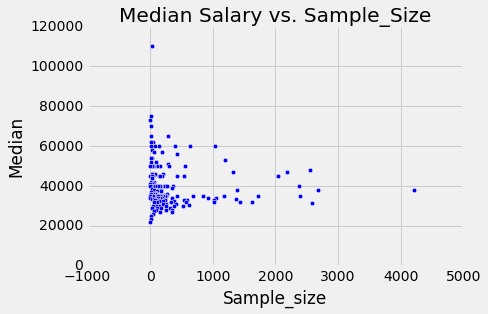

In [6]:
(recent_grads.plot(x='Sample_size', y = 'Median', 
                   kind = 'scatter', title = 'Median Salary vs. Sample_Size',
                  ))

To a degree, more popular majors seem to have higher Median Salaries. However, this is only true until about \$65,000. After that point, an increase in Median Salary doesn't necessarily mean that that course was more popular among students. 

This could be because majors with high Median salaries were very difficult to get into, thus some of those courses had fewer students. 

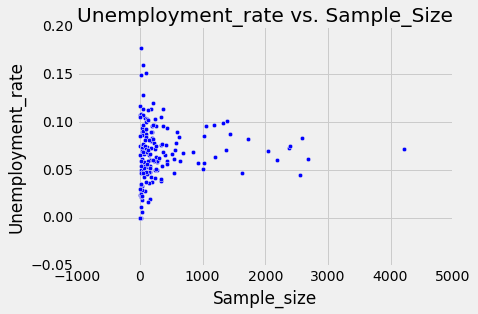

In [7]:
(recent_grads.plot(x='Sample_size', y = 'Unemployment_rate', 
                   kind = 'scatter', title = 'Unemployment_rate vs. Sample_Size',
                  ))

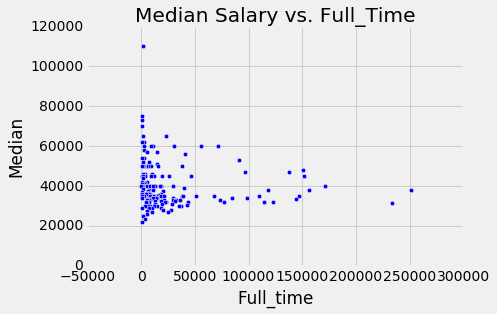

In [8]:
(recent_grads.plot(x='Full_time', y = 'Median', 
                   kind = 'scatter', title = 'Median Salary vs. Full_Time',
                  ))

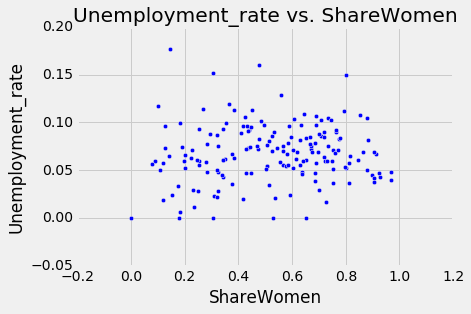

In [9]:
(recent_grads.plot(x='ShareWomen', y = 'Unemployment_rate', 
                   kind = 'scatter', title = 'Unemployment_rate vs. ShareWomen',
                  ))

From the above plot, it can be ascertained that there is no clear link at all between the percentage of women in a major, and the unemployment rate of the graduates of that major.

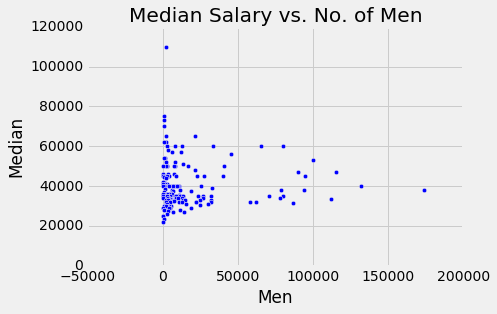

In [10]:
(recent_grads.plot(x='Men', y = 'Median', 
                   kind = 'scatter', title = 'Median Salary vs. No. of Men',
                  ))

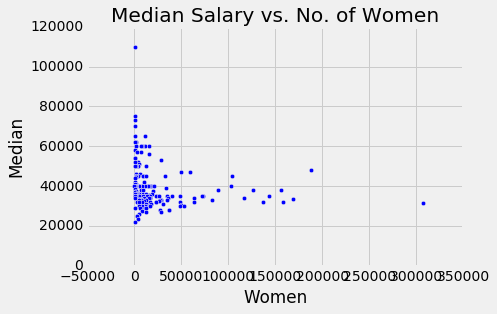

In [11]:
(recent_grads.plot(x='Women', y = 'Median', 
                   kind = 'scatter', title = 'Median Salary vs. No. of Women',
                  ))

The above two plots suggest that there is a slightly more pronounced trend in the case of the number of males in a major, and the Median Salary of that major. 

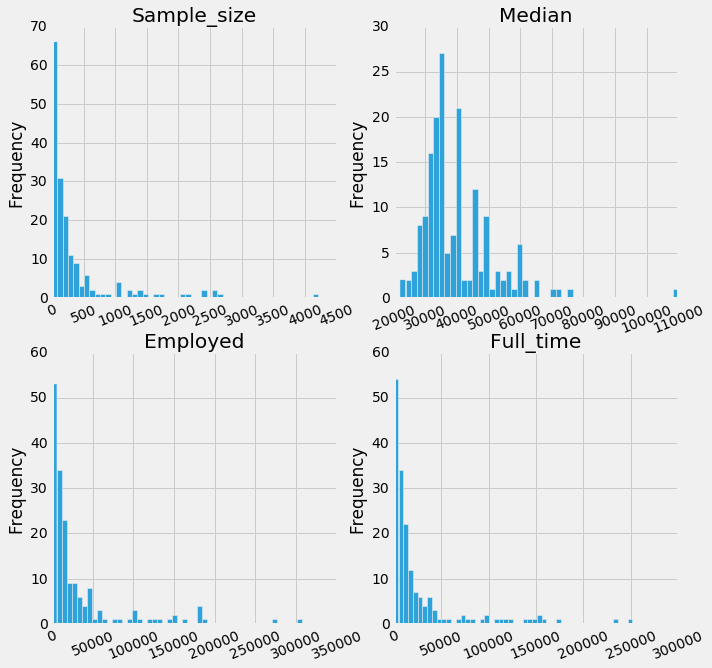

In [12]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(10,10))
for r in range(1,5):
    ax = fig.add_subplot(2,2,r)
    ax = recent_grads[cols[r-1]].plot(kind='hist', rot=22, bins = 50)
    ax.set_title(cols[r-1])

We see from the first graph that the most common median salary range is from \$35,000-\$40,000.

We also observe that for most majors, graduates tend to successfully find full-time work. The number of graduates that do not find employment, or find employment other than full-time employment, is a fairly small amount.

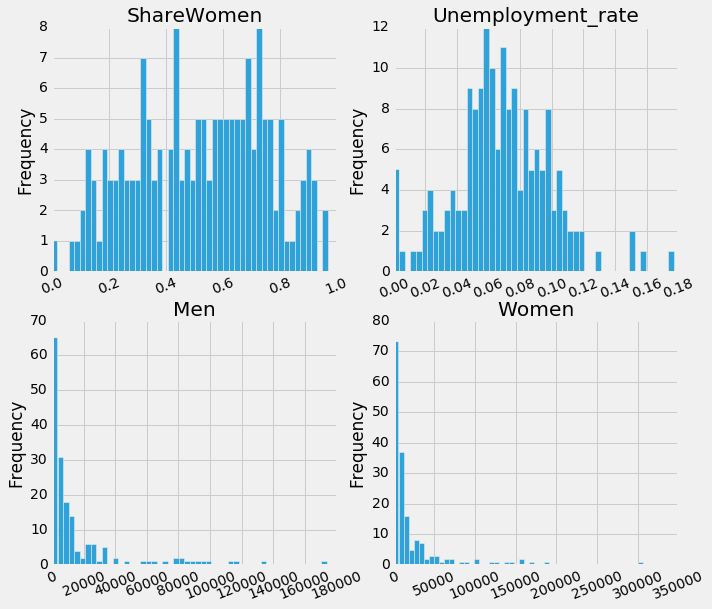

In [13]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(10,9))
for r in range(5,9):
    ax = fig.add_subplot(2,2,r-4)
    ax = recent_grads[cols[r-1]].plot(kind='hist', rot=22, bins = 50)
    ax.set_title(cols[r-1])

We also see that there are many majors that are predominantly female, than are predominantly male. 

### Scatter-Matrix Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7dd3184e0>,
      dtype=object)

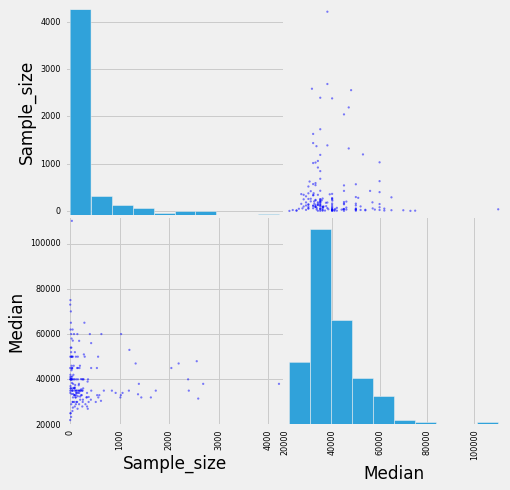

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7dc877048>,
      dtype=object)

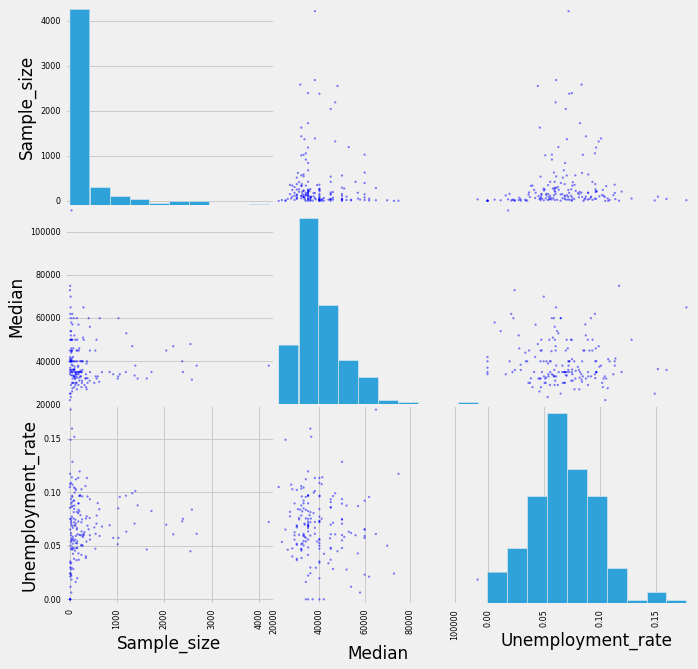

In [15]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

The previous scatter plots and histograms can be plotted to appear together in a scatter matrix such as the ones seen above. 

The conclusions to be drawn are largely the same - the median salary is in the \$35,000-40,000 range. 

One curious thing to observe is that there appears to be no clear correlation between Median Salary and Unemployment Rate of a major. One might that that a major that had a higher median salary would also have lower unemployment rates, but this doesn't seem to be the case. This could be because jobs relevant to a major might be difficult to acquire, but once acquired, they pay better.

### Bar Plots

Comparing percentages of women (`ShareWomen`) from first 10 rows and last 10 rows of `recent_grads` dataframe.

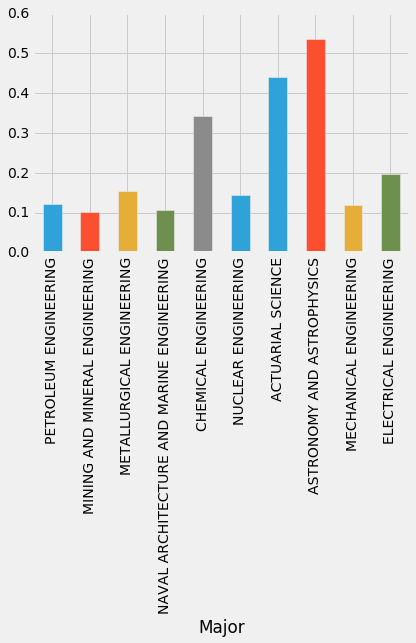

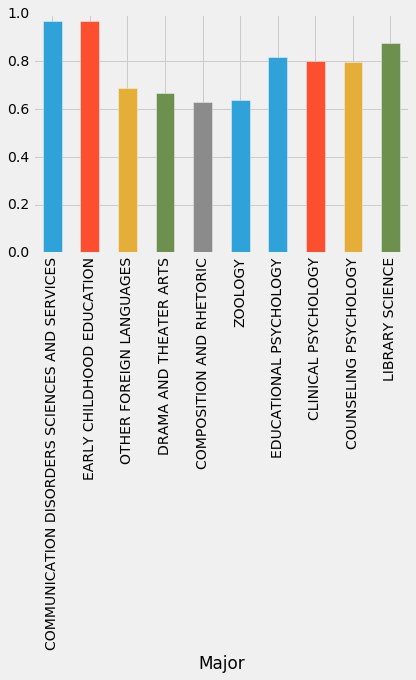

In [16]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)

We see that the first 10 rows of the `recent_grads` dataframe tends to contain majors with very few percentages of female graduates. This is because the earlier rows include plenty of Engineering majors, which as a whole tends to have a male-dominated student-base. Chemical Engineering stands out among the other Engineering majors seen in the first 10 rows, having 35% female graduates. In comparison, the other Engineering majors have 15-20% female graduates.

Language and Humanities-related majors have a very large portion of female graduates. Majors like 'Early Childhood Education' are comprised almost entirely of female graduates. 

Comparing unemployment rates of each major (`Unemployment_rate`) from first 10 rows and last 10 rows of `recent_grads` dataframe.

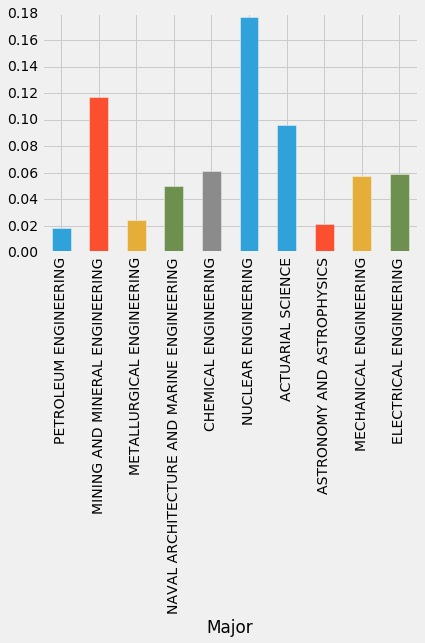

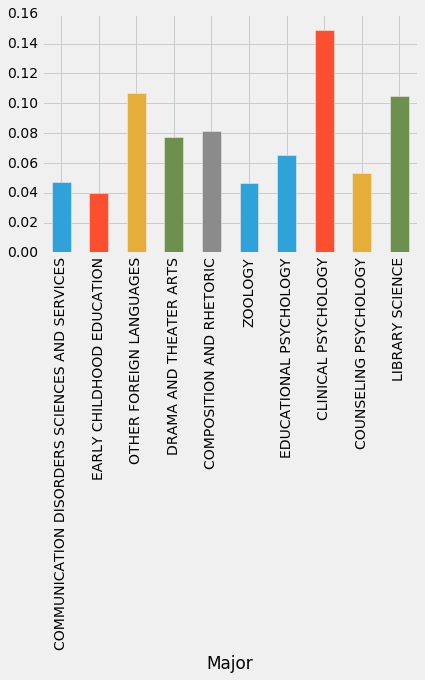

In [17]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

In general, we observe that unemployment rates for Engineering-related majors is very low. The exception is the field of Nuclear Engineering, with an unemployment rate of almost 20%. This stands out against the other Engineering fields that have an unemployment rate of on average 5-10% or less. This could be because the demand for Nuclear Engineers is much lower than the amount of Nuclear Engineers available, making it an extremely competitive market. 

The average unemployment rates for humanities related major are slightly higher, though not very significantly. 